In [1]:
# Metacognition setup to implement
# - https://docs.google.com/document/d/1oNY2kSwMGya3hb562XIk6HuD-OU7cwvRo5--rTvMa58/edit

In [2]:
## Model for MC, Solver, World from s1s2model.py file

In [3]:
import s1s2model as s1s2

In [4]:
# Instantiate S1
s1 = s1s2.Solver()
s1.name = "S1"
s1.printSolver()

Solver class instantiated
name:  S1
solver_type: S1
solver_output_action: default_action
solver_output_confidence: 0.5
solver_output_reward: 1.0
solver_time_taken: 1.0


In [5]:
# Instantiate S2
s2 = s1s2.Solver()
s2.name = "S2"
s2.solver_type = "S2"
s2.solver_output_confidence = 1.0
s2.solver_time_taken = 3
s2.printSolver()

Solver class instantiated
name:  S2
solver_type: S2
solver_output_action: default_action
solver_output_confidence: 1.0
solver_output_reward: 1.0
solver_time_taken: 3


In [6]:
# Instantiate MC
mc = s1s2.MC()
mc.printMC()

MC class instantiated
solvers:  []
mc_value: 1.0
solver_choice: None
reliability_values: {}
solver_costs: {}


In [7]:
# Now configure MC with instantiated solvers
mc.solvers.append(s1)
mc.reliability_values[s1.name] = s1.solver_output_reward * s1.solver_output_confidence
mc.solver_costs[s1.name] = s1.solver_time_taken 
mc.solvers.append(s2)
mc.reliability_values[s2.name] = s2.solver_output_reward * s2.solver_output_confidence
mc.solver_costs[s2.name] = s2.solver_time_taken 
# Now print
mc.printMC()

solvers:  [<s1s2model.Solver object at 0x7faf9810a510>, <s1s2model.Solver object at 0x7faf9810a650>]
mc_value: 1.0
solver_choice: None
reliability_values: {'S1': 0.5, 'S2': 1.0}
solver_costs: {'S1': 1.0, 'S2': 3}


In [8]:
# Instantiate AgentSystem
a = s1s2.AgentSystem()
a.mc = mc
a.printAgentSystem()

Agent System class instantiated
mc:  <s1s2model.MC object at 0x7faf9810a8d0>
current_time: 0
aggregate_reward: 0
aggregate_cost: 0
aggregate_duration: 0


In [16]:
# Now run the AgentSystem for sometime
a.reset()
a.runSimulation(10)

 -> decision# = 0, solver = 1, duration = 3,  agg. reward = 1.0
 -> decision# = 1, solver = 0, duration = 4.0,  agg. reward = 2.0
 -> decision# = 2, solver = 1, duration = 7.0,  agg. reward = 3.0
 -> decision# = 3, solver = 1, duration = 10.0,  agg. reward = 4.0
 -> decision# = 4, solver = 0, duration = 11.0,  agg. reward = 5.0
 -> decision# = 5, solver = 1, duration = 14.0,  agg. reward = 6.0
 -> decision# = 6, solver = 0, duration = 15.0,  agg. reward = 7.0
 -> decision# = 7, solver = 1, duration = 18.0,  agg. reward = 8.0
 -> decision# = 8, solver = 1, duration = 21.0,  agg. reward = 9.0
 -> decision# = 9, solver = 0, duration = 22.0,  agg. reward = 10.0


In [17]:
# Print status at the end
a.printAgentSystem()

mc:  <s1s2model.MC object at 0x7faf9810a8d0>
current_time: 22.0
aggregate_reward: 10.0
aggregate_cost: 0
aggregate_duration: 22.0


In [18]:
a.decision_stats

[[0, 1, 3, 1.0],
 [1, 0, 4.0, 2.0],
 [2, 1, 7.0, 3.0],
 [3, 1, 10.0, 4.0],
 [4, 0, 11.0, 5.0],
 [5, 1, 14.0, 6.0],
 [6, 0, 15.0, 7.0],
 [7, 1, 18.0, 8.0],
 [8, 1, 21.0, 9.0],
 [9, 0, 22.0, 10.0]]

In [19]:
# Display figures
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults; set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


In [20]:
import pandas as pd

In [21]:
cols = ['instance', 'solver', 'duration', 'reward']
df = pd.DataFrame(a.decision_stats, columns=cols)
df

,instance,solver,duration,reward
0,0,1,3.0,1.0
1,1,0,4.0,2.0
2,2,1,7.0,3.0
3,3,1,10.0,4.0
4,4,0,11.0,5.0
5,5,1,14.0,6.0
6,6,0,15.0,7.0
7,7,1,18.0,8.0
8,8,1,21.0,9.0
9,9,0,22.0,10.0


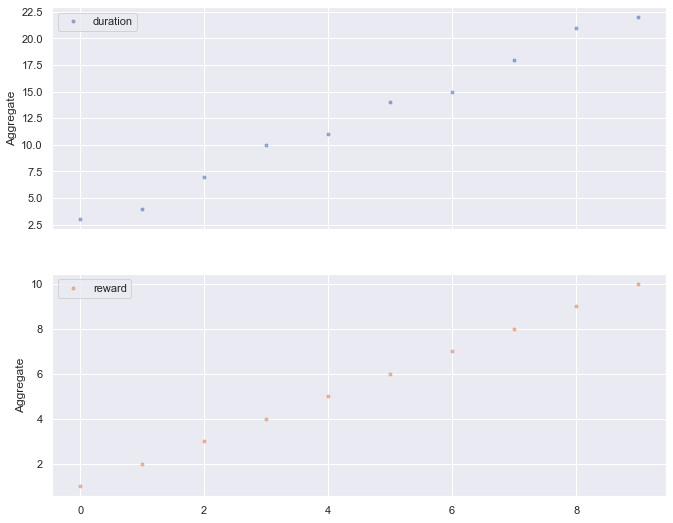

In [22]:
# Multiple information about aggregate
cols_plot = ['duration', 'reward']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Aggregate')

# More Complex Behavior

In [23]:
# Reference: Pomegranate library usage
#  - https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l17-uncertainty/DecisionMaking%20Uncertainty.ipynb
#  - https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_1_Distributions.ipynb

In [24]:
## Install as needed
#!pip install pomegranate

In [25]:
# Imports and setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *


In [26]:
# Initially the door selected by the guest is completely random
s1_actions = DiscreteDistribution( { 'a1': 1./4, 'a2': 3./4} )
s2_actions = DiscreteDistribution( { 'a1': 1./2, 'a2': 1./2} )

In [27]:
# Checking out some sample data
for i in range(10):
    print (s1_actions.sample())

a2
a2
a2
a2
a1
a2
a1
a2
a1
a2


In [28]:
# Docs: https://pomegranate.readthedocs.io/en/latest/Distributions.html#pomegranate.distributions.DiscreteDistribution
# Getting probability of an action
print (s1_actions.probability('a1'))

0.25
